# <font color=red>**Mr Fugu Data Science**</font>

# `India Indeed Webscraping Help for Viewer - June 2022`

`(Code should work with Indeed in other countries)`


# (◕‿◕✿)

In [379]:
# import os
import requests
from bs4 import BeautifulSoup # webscrape
from collections import defaultdict # default dictionary: store a list with each key
import pandas as pd     # DF
import re               # regular expressions
import datetime         # format date/time

In [380]:
# Ex. City we will investigate: Chennai, Tamil Nadu

# `Where do we start with scrapping this page?`

+ Let's look at a good starting point

+ `Notice that this block on the left is highlighted from the code on the right. This contains all the entries for the page and we should start here.`

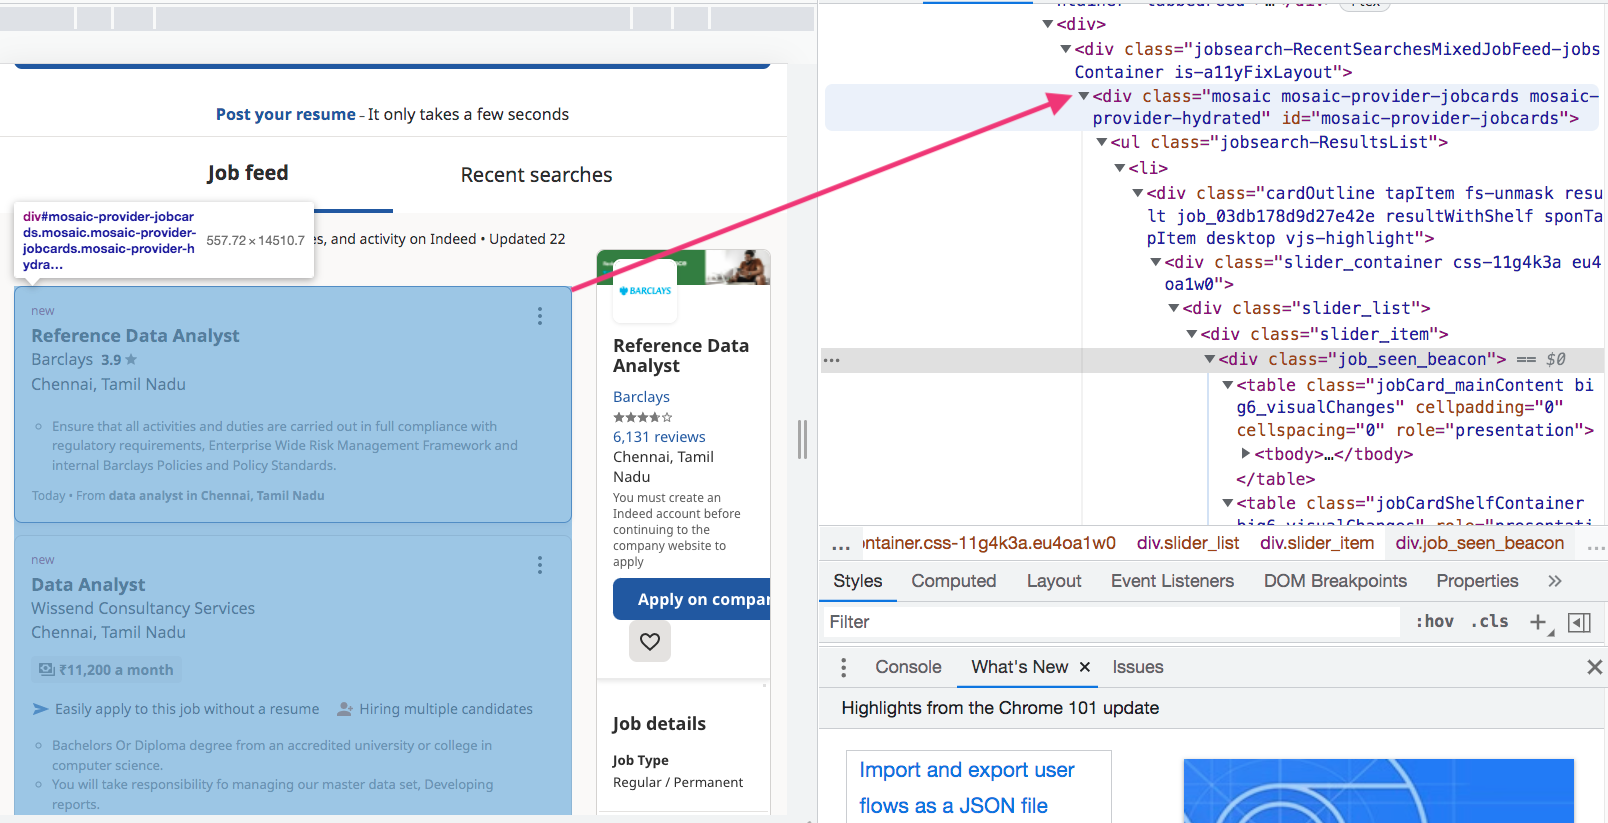

In [382]:
from IPython import display
display.Image("./screen_shot_01.png")

# `Now we have a separate hurdle and it comes in 2 steps`

+ Look for **`Lists (li/ul)`**
+ entering **`tables (tbody/tr)`**

Our data are stored within these. When working with this always start from outer to inner. There are cases where you will find something called a "*shadow dom*" which can be problematic and I am not going to discuss today but look into it.

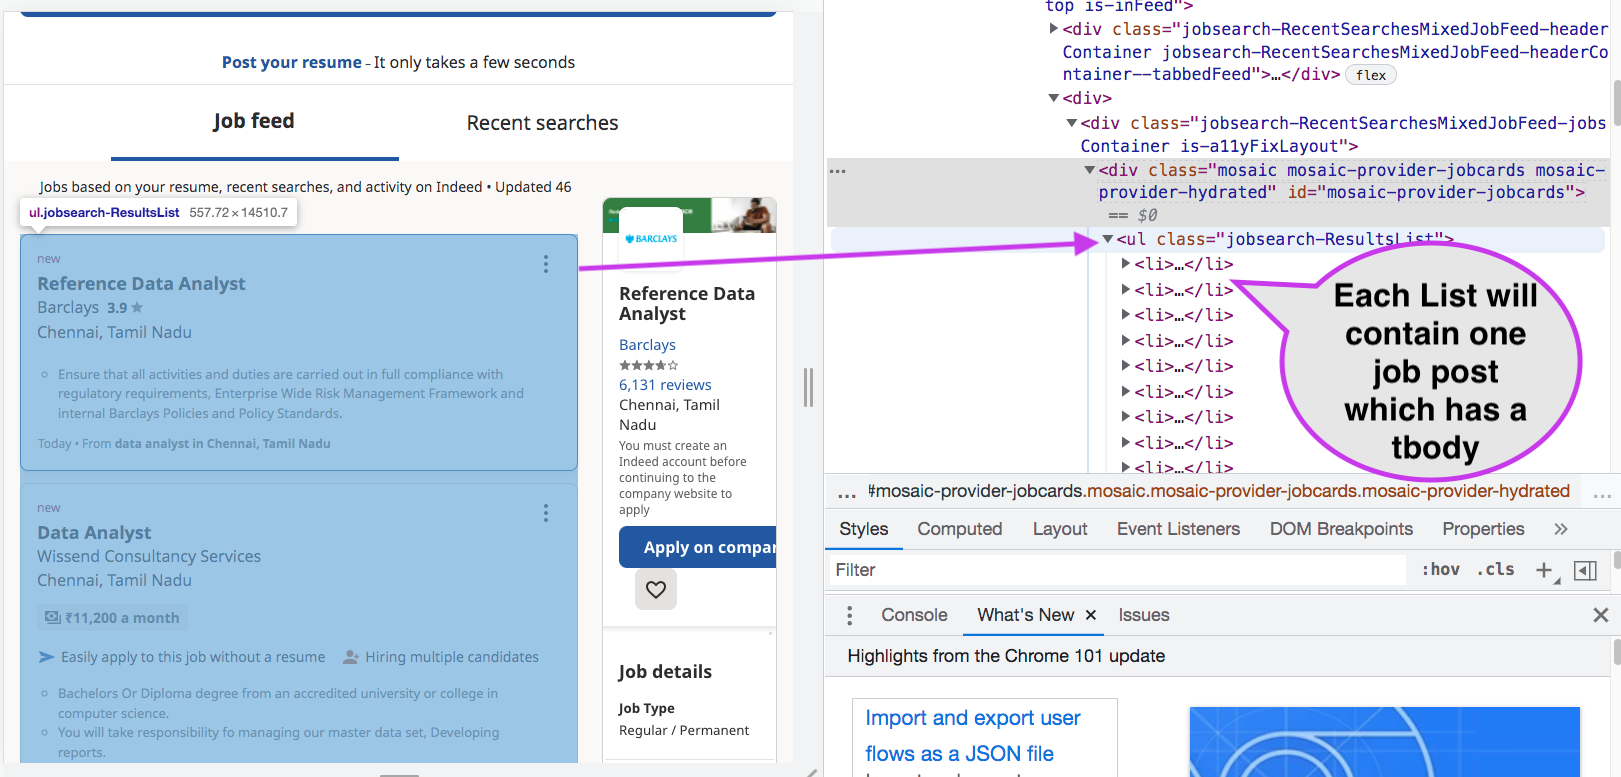

In [383]:
display.Image("./screen_shot_02.png")

# `When we enter the Lists, we have more data which is hidden inside like an onion we need to peel.`

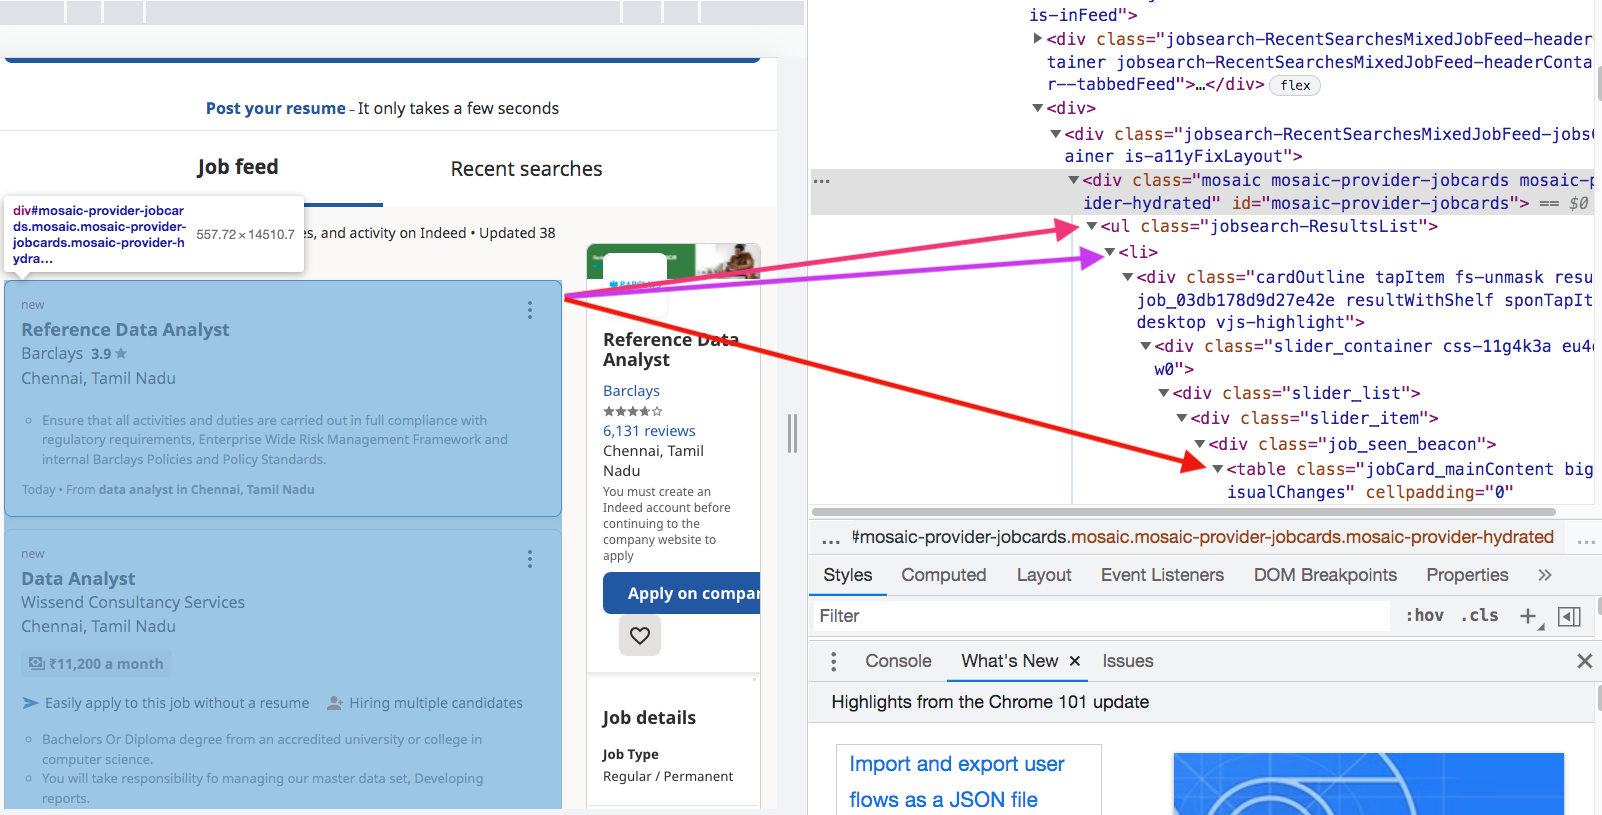

In [384]:
display.Image("./screen_shot_03.png")

# Notice the table that we have to enter now.

+ The table has `tr/td` designation which will store our data. 

Look at the Left highlighted portion because we have `position, company name and location here`
 + *`You do need to pay attention because NOT all postings have the same formatting and we have to account for this hiccup with exceptions or extra code to find them.`*
     + This was a problem in the past with scraping Indeed as of 2021 from what I remember. 

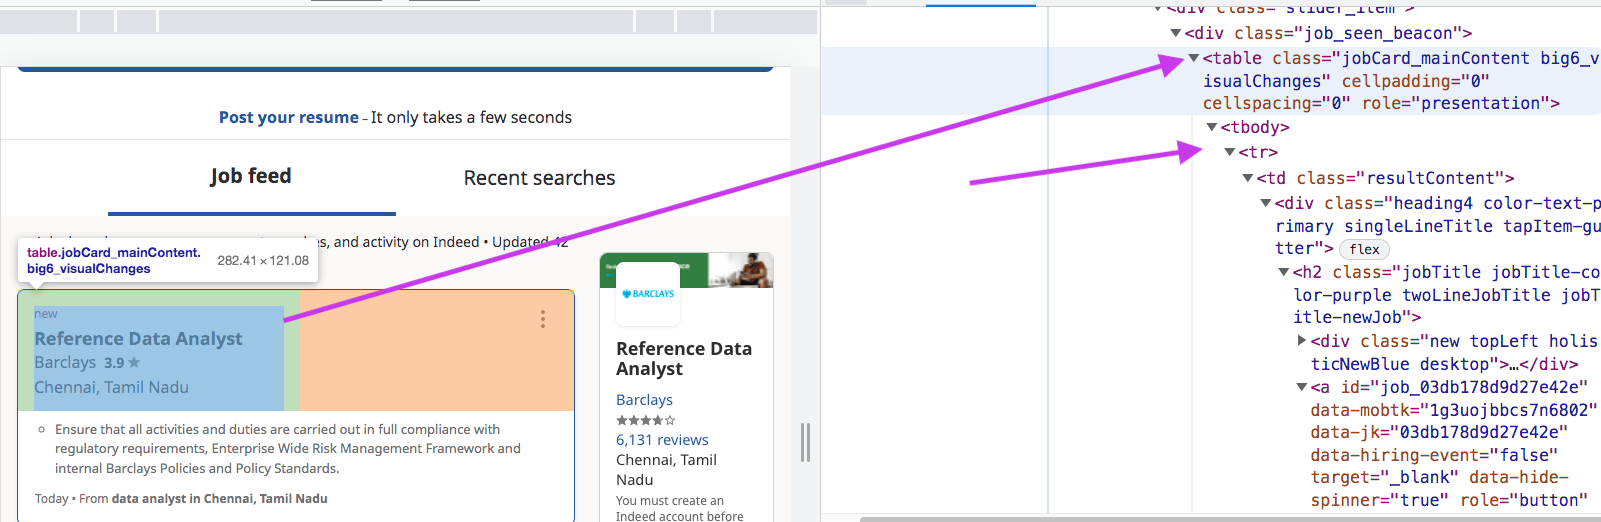

In [385]:
display.Image("./screen_shot_04.png")

In [363]:
# this was used for the person contacting me who had these details for their system
headers = {
    "User-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}

# Skills & Place of Work
skill = input('Enter your Skill: ').strip()
place = input('Enter the location: ').strip()
no_of_pages = int(input('Enter the # of pages to scrape: '))

indeed_posts=[]

for page in range(no_of_pages):
    
        url = 'https://www.indeed.co.in/jobs?q=' + skill + \
            '&l=' + place + '&sort=date' +'&start='+ str(page * 10)
        
        response = requests.get(url, headers=headers)
        html = response.text

        # Scrapping the Web
        soup = BeautifulSoup(html, 'lxml')

        # Outer Most Entry Point of HTML:
        outer_most_point=soup.find('div',attrs={'id': 'mosaic-provider-jobcards'})
        
        # "UL" lists where the data are stored:
        
        for i in outer_most_point.find('ul'):
            
        # Job Title:
        
            job_title=i.find('h2',{'class':'jobTitle jobTitle-color-purple jobTitle-newJob'})
#             print(job_title)
            if job_title != None:
                jobs=job_title.find('a').text

        # Company Name:
    
            if i.find('span',{'class':'companyName'}) != None:
                company=i.find('span',{'class':'companyName'}).text   
                
        # Links:
        
            if i.find('a') != None:
                links=i.find('a',{'class':'jcs-JobTitle'})['href']
                
        # Salary if available:
        
            if i.find('div',{'class':'attribute_snippet'}) != None:
                salary=i.find('div',{'class':'attribute_snippet'}).text

            else:
                salary='No Salary'

        # Job Post Date:

            if i.find('span', attrs={'class': 'date'}) != None:
                post_date = i.find('span', attrs={'class': 'date'}).text

        # Put everything together in a list of lists for the default dictionary
                        
            indeed_posts.append([company,jobs,links,salary, post_date])
            
            
# put together in list

# (create a dictionary with keys and a list of values from above "indeed_posts")

indeed_dict_list=defaultdict(list)

# Fields for our DF 

indeed_spec=['Company','job','link','Salary','Job_Posted_Date']


Enter your Skill: data analyst
Enter the location: Chennai, Tamil Nadu
Enter the # of pages to scrape: 2


In [364]:
# Example of the layout for our future DF or if you want to store in this format or convert to defaultdict()

a=indeed_posts[0]
list(zip(indeed_spec,a))


[('Company', 'Shell'),
 ('job', 'Data Science Analyst'),
 ('link', '/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7d8e6&vjs=3'),
 ('Salary', 'No Salary'),
 ('Job_Posted_Date', 'PostedJust posted')]

In [365]:
# Each entry is a list with 5 fields

indeed_posts

[['Shell',
  'Data Science Analyst',
  '/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7d8e6&vjs=3',
  'No Salary',
  'PostedJust posted'],
 ['Applied Data Finance',
  'Senior Business Analyst',
  '/rc/clk?jk=d370db4dde5e29c9&fccid=49ff321cf42a70bd&vjs=3',
  'No Salary',
  'PostedJust posted'],
 ['WELLS FARGO BANK',
  'Finance Analyst',
  '/rc/clk?jk=0adb9e03a16ba7f9&fccid=78bbcd26e39621f5&vjs=3',
  'No Salary',
  'PostedJust posted'],
 ['GAIN Credit',
  'Team Lead - BI',
  '/rc/clk?jk=45d36def7dccbaca&fccid=f93bef9eefa32e8a&vjs=3',
  'No Salary',
  'PostedJust posted'],
 ['BNY Mellon',
  'Analyst, Client Onboarding/Transitions/Conversions/Know Your...',
  '/rc/clk?jk=fd0482c912beac0e&fccid=b4048be2884af072&vjs=3',
  'No Salary',
  'PostedToday'],
 ['BNY Mellon',
  'Analyst, Client Onboarding/Transitions/Conversions/Know Your...',
  '/rc/clk?jk=fd0482c912beac0e&fccid=b4048be2884af072&vjs=3',
  'No Salary',
  'PostedToday'],
 ['Elsevier',
  'Business Intelligence Analyst (Reporting) 0522-

In [366]:
# Getting the Date a Job was Posted as a string:

for i in range(len(indeed_posts)):
#     print(indeed_posts[i])
    p=(list(zip(indeed_spec,indeed_posts[i])))
    
    for j in p:
        indeed_dict_list[j[0]].append(j[1]) # using default dictionary
        
indeed_dict_list

defaultdict(list,
            {'Company': ['Shell',
              'Applied Data Finance',
              'WELLS FARGO BANK',
              'GAIN Credit',
              'BNY Mellon',
              'BNY Mellon',
              'Elsevier',
              'RELX',
              'NatWest Group',
              'BNY Mellon',
              'Flex',
              'Flex',
              'Elsevier',
              'RELX',
              'AstraZeneca',
              'Barclays',
              'Citi',
              'Citi',
              'Zigsaw',
              'CIEL HR Services',
              'Genesys',
              'Illumine Industries',
              'Vestas',
              'Vestas',
              'NielsenIQ',
              'CGI Inc',
              'Genesys',
              'ADCI - Tamil Nadu',
              'Accenture',
              'Accenture',
              'GrepTech Solutions',
              'BNY Mellon',
              'Petrofac',
              'BNY Mellon',
              'Standard Chartered',
     

In [367]:
# Or if you want to have just a DF

print(pd.DataFrame(indeed_posts,columns=indeed_spec)['link'][0]) 
#these are not the same, probably from recruiter(s)
print(pd.DataFrame(indeed_posts,columns=indeed_spec)['link'][1])

pd.DataFrame(indeed_posts,columns=indeed_spec)


/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7d8e6&vjs=3
/rc/clk?jk=d370db4dde5e29c9&fccid=49ff321cf42a70bd&vjs=3


,Company,job,link,Salary,Job_Posted_Date
0,Shell,Data Science Analyst,/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7...,No Salary,PostedJust posted
1,Applied Data Finance,Senior Business Analyst,/rc/clk?jk=d370db4dde5e29c9&fccid=49ff321cf42a...,No Salary,PostedJust posted
2,WELLS FARGO BANK,Finance Analyst,/rc/clk?jk=0adb9e03a16ba7f9&fccid=78bbcd26e396...,No Salary,PostedJust posted
3,GAIN Credit,Team Lead - BI,/rc/clk?jk=45d36def7dccbaca&fccid=f93bef9eefa3...,No Salary,PostedJust posted
4,BNY Mellon,"Analyst, Client Onboarding/Transitions/Convers...",/rc/clk?jk=fd0482c912beac0e&fccid=b4048be2884a...,No Salary,PostedToday
5,BNY Mellon,"Analyst, Client Onboarding/Transitions/Convers...",/rc/clk?jk=fd0482c912beac0e&fccid=b4048be2884a...,No Salary,PostedToday
6,Elsevier,Business Intelligence Analyst (Reporting) 0522...,/rc/clk?jk=3ae80f82e11efb8f&fccid=cc83b93538e0...,No Salary,PostedToday
7,RELX,Business Intelligence Analyst (Reporting) 0522...,/rc/clk?jk=cd57a23a1fd0910b&fccid=098f028fec64...,No Salary,PostedToday
8,NatWest Group,Principal Business Analyst,/rc/clk?jk=c59d3928d341c94b&fccid=4a3a2b1eb3ec...,No Salary,PostedToday
9,BNY Mellon,"Analyst, Client Reporting/Perf",/rc/clk?jk=ca601bda19661689&fccid=b4048be2884a...,No Salary,PostedToday


In [375]:
import re               # regular expressions
import datetime         # format date/time

# Let's deal with fixing posting dates using Regular Expressions

indeed_jobs_df = pd.DataFrame(indeed_posts,columns=indeed_spec)


dates_converted=[]

for i in indeed_jobs_df['Job_Posted_Date']:

    if re.findall(r'[0-9]',i):
        # if the string has digits convert each entry to single string: ['3','0']->'30'
        b=''.join(re.findall(r'[0-9]',i))
        
        # convert string int to int and subtract from today's date and format
        g=(datetime.datetime.today()-datetime.timedelta(int(b))).strftime('%m-%d-%Y')

        dates_converted.append(g)
        
#     if i.find('today') or i.find('just posted'):
#         p=(datetime.datetime.today().strftime('%m-%d-%Y'))
#         v.append(p)
        
    else: # this will contain strings like: 'just posted' or 'today' etc before convert
        dates_converted.append(datetime.datetime.today().strftime('%m-%d-%Y'))
dates_converted

['06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-06-2022',
 '06-05-2022',
 '06-04-2022',
 '06-04-2022',
 '06-04-2022',
 '06-04-2022',
 '06-04-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-03-2022',
 '06-02-2022',
 '06-02-2022',
 '06-02-2022',
 '06-02-2022',
 '06-02-2022']

In [377]:
# Update DF Column for Job Posted Dates:

indeed_jobs_df['Job_Posted_Date']= dates_converted

indeed_jobs_df

,Company,job,link,Salary,Job_Posted_Date
0,Shell,Data Science Analyst,/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7...,No Salary,06-06-2022
1,Applied Data Finance,Senior Business Analyst,/rc/clk?jk=d370db4dde5e29c9&fccid=49ff321cf42a...,No Salary,06-06-2022
2,WELLS FARGO BANK,Finance Analyst,/rc/clk?jk=0adb9e03a16ba7f9&fccid=78bbcd26e396...,No Salary,06-06-2022
3,GAIN Credit,Team Lead - BI,/rc/clk?jk=45d36def7dccbaca&fccid=f93bef9eefa3...,No Salary,06-06-2022
4,BNY Mellon,"Analyst, Client Onboarding/Transitions/Convers...",/rc/clk?jk=fd0482c912beac0e&fccid=b4048be2884a...,No Salary,06-06-2022
5,BNY Mellon,"Analyst, Client Onboarding/Transitions/Convers...",/rc/clk?jk=fd0482c912beac0e&fccid=b4048be2884a...,No Salary,06-06-2022
6,Elsevier,Business Intelligence Analyst (Reporting) 0522...,/rc/clk?jk=3ae80f82e11efb8f&fccid=cc83b93538e0...,No Salary,06-06-2022
7,RELX,Business Intelligence Analyst (Reporting) 0522...,/rc/clk?jk=cd57a23a1fd0910b&fccid=098f028fec64...,No Salary,06-06-2022
8,NatWest Group,Principal Business Analyst,/rc/clk?jk=c59d3928d341c94b&fccid=4a3a2b1eb3ec...,No Salary,06-06-2022
9,BNY Mellon,"Analyst, Client Reporting/Perf",/rc/clk?jk=ca601bda19661689&fccid=b4048be2884a...,No Salary,06-06-2022


# Explain Links from postings:

+ Each link goes to a separate page which includes the full job description and relevant information. 
    + You can iterate each link and take whatever information you are interested in.

In our example we have something that looks like this:

`indeed_jobs_df['link'][0] : '/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7d8e6&vjs=3'`

The way we would hand this would look something like this:

`https://www.indeed.co.in/rc/clk?jk=d29dc2370a030c6b&fccid=167aa4ca2fe7d8e6&vjs=3`

and we can webscrape just as usual

you could have a setup like this: 


#  This will not exactly work and needs to be modified! 

hoop=[]

for i in range(len(gg)):

    op=requests.get('www.indeed.co.in'+gg[i]['link'])
    
    sou_=bsopa(op.text,'html.parser')
    
    for ii in sou_.find('div',{'class':'jobsearch-jobDescriptionText'}): `# this will need to be modified!`
        
        try:
            
            hoop.append([i,''.join(ii.text.strip())])
        
        except AttributeError:
            
            hoop.append([i,''])
hoop[0]


this is an example from a prior video 2 years ago about parsing Indeed.com which has examples you will not see today. 

Github from prior webscraping or indeed.com related: https://github.com/MrFuguDataScience/Webscraping

# `Thank you for watching:`


# (◕‿◕✿)

# <font color=red> Like , Share & SUBscribe</font>